In [19]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



loans = pd.read_csv("https://static-resources.zybooks.com/static/loans.csv")

In [20]:
#1 
loans.head()

,amount,experience,gender,age,status
0,6,N,F,32,Safe
1,11,Y,F,40,Safe
2,15,Y,M,53,Safe
3,23,Y,F,42,Safe
4,28,N,F,69,Risky


In [21]:
#2
y = loans.status
print(y[:5])

0     Safe
1     Safe
2     Safe
3     Safe
4    Risky
Name: status, dtype: object


In [22]:
#3
exp = loans.experience == "Y"
print(exp[:5])

0    False
1     True
2     True
3     True
4    False
Name: experience, dtype: bool


In [23]:
#4
bool_val = np.multiply(exp, 1)
print(bool_val[:5])

0    0
1    1
2    1
3    1
4    0
Name: experience, dtype: int64


In [24]:
#5
df = pd.DataFrame(bool_val, columns = ["experience"])
df.head()

,experience
0,0
1,1
2,1
3,1
4,0


In [25]:
#6
X = pd.concat([loans.amount, df], axis=1)
X.head()

,amount,experience
0,6,0
1,11,1
2,15,1
3,23,1
4,28,0


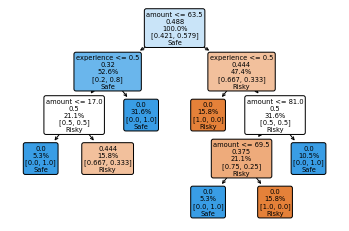

In [9]:
#7
clf = tree.DecisionTreeClassifier(min_samples_split = 4)
model = clf.fit(X, y)
tree.plot_tree(model, feature_names = X.columns, label = None, impurity = True,  class_names= ["Risky", "Safe"], rounded = True,filled = True, proportion = True)
plt.show()


In [28]:
#8
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 10)  

scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

cart = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=3, min_samples_leaf=5)
cart.fit(x_train, y_train)
y_pred = cart.predict(x_test)

conf = metrics.confusion_matrix(y_test, y_pred)


print('Predictions:', y_pred)

Predictions: ['Safe' 'Safe' 'Risky' 'Safe' 'Safe' 'Safe']


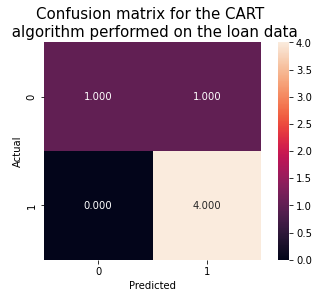

In [31]:
#9
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Confusion matrix for the CART \n algorithm performed on the loan data', fontsize = 15);

In [32]:
print("Testing Score Accuracy {:.2f}".format(cart.score(x_test, y_test)))

Testing Score Accuracy 0.83
